# Data cleaning


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Đọc file dữ liệu
path = 'liquor.csv'
df = pd.read_csv(path)
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_26028\3847165079.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [3]:
df.shape

(12591077, 24)

In [4]:
print(df['Date'].dtype)

object


In [5]:
# Định dạng lại ngày tháng năm và lấy ra ngày sớm nhất và muộn nhất
df['Date'] = pd.to_datetime(df['Date'])
print('Ngày sớm nhất: ', df['Date'].min())
print('Ngày muộn nhất: ', df['Date'].max())

Ngày sớm nhất:  2012-01-03 00:00:00
Ngày muộn nhất:  2017-10-31 00:00:00


In [6]:
# Lọc dữ liệu trước năm 2016
df = df[df['Date'].dt.year < 2016]
print('Ngày sớm nhất: ', df['Date'].min())
print('Ngày muộn nhất: ', df['Date'].max())

Ngày sớm nhất:  2012-01-03 00:00:00
Ngày muộn nhất:  2015-12-31 00:00:00


In [7]:
# Xóa các cột không cần thiết
df = df.drop(['Store Number', 'County Number', 'Item Description', 'Vendor Number', 'Category'], axis=1)
df.head()

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,County,Category Name,Vendor Name,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,2015-11-20,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",Lee,NaN,Wilson Daniels Ltd.,297,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,2015-11-21,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",Page,NaN,Wilson Daniels Ltd.,297,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,2015-11-16,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",Lee,NaN,Disaronno International LLC,249,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,2015-11-04,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,Johnson,NaN,Jim Beam Brands,237,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,2015-11-17,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",Tama,NaN,Disaronno International LLC,249,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [8]:
# Loại bỏ các dòng dữ liệu chứa giá trị rỗng
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Invoice/Item Number      0
Date                     0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County                   0
Category Name            0
Vendor Name              0
Item Number              0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Xóa dữ liệu trùng lặp
df = df.drop_duplicates()


In [11]:
# Loại bỏ kí hiệu $ và định dạng kiểu dữ liệu các trường
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('$', '') #removing dollar sign
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('$', '') #removing dollar sign
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('$', '') #removing dollar sign
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float64')
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float64')
df['Sales'] = df['Sale (Dollars)'].str.strip()
df['Sales'] = df['Sales'].str.replace(',', '')
df['Sales'] = df['Sales'].astype('float64')



In [12]:
# Thêm cột Lợi nhuận trên 1 chai và Lợi nhuận trên tổng số chai
df['State Profit Per Bottle'] = df['State Bottle Retail'] - df['State Bottle Cost']
df['State Profit Total Bottle'] = df['State Profit Per Bottle']*df['Bottles Sold']

In [13]:
# Thêm các cột ngày, tháng, năm
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df["Year_m"] = df["Date"].astype(str).str[:7]
df.head(3)

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,County,Category Name,Vendor Name,...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Sales,State Profit Per Bottle,State Profit Total Bottle,Day,Month,Year,Year_m
6,S28865700001,2015-11-09,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,...,104.58,9.0,2.38,104.58,5.81,34.86,9,11,2015,2015-11
8,S29339300091,2015-11-30,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",Muscatine,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,...,117.48,3.0,0.79,117.48,9.79,39.16,30,11,2015,2015-11
13,S28866900001,2015-11-11,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,Ida,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,...,17.43,1.5,0.40,17.43,5.81,5.81,11,11,2015,2015-11


# QA & Visuazilation


1. Số lượng chai rượu tiêu thụ qua các năm?

In [14]:
Total_bottles = df.groupby(df["Year"])["Bottles Sold"].sum().reset_index(name='Total_Quantity')
print(Total_bottles)


   Year  Total_Quantity
0  2012        19890824
1  2013        19911077
2  2014        20649238
3  2015        21552771


2. Số lượng chai rượu bán ra trong các tháng?

In [15]:

#Total_bottles = df.groupby(df["Year_m"])["Bottles Sold"].sum()
Total_bottles = df.groupby(df["Year_m"])["Bottles Sold"].agg(Total_Bottles_Sold='sum')
Total_bottles = Total_bottles.reset_index()
print(Total_bottles)

     Year_m  Total_Bottles_Sold
0   2012-01             1300469
1   2012-02             1456256
2   2012-03             1457116
3   2012-04             1586877
4   2012-05             1780108
5   2012-06             1681254
6   2012-07             1646742
7   2012-08             1732262
8   2012-09             1406953
9   2012-10             2390968
10  2012-11             1540585
11  2012-12             1911234
12  2013-01             1451968
13  2013-02             1403119
14  2013-03             1419853
15  2013-04             1742459
16  2013-05             1745914
17  2013-06             1531342
18  2013-07             1806986
19  2013-08             1674200
20  2013-09             1509383
21  2013-10             2306521
22  2013-11             1383205
23  2013-12             1936127
24  2014-01             1568572
25  2014-02             1471379
26  2014-03             1498687
27  2014-04             1756197
28  2014-05             1622126
29  2014-06             1842592
30  2014

Trực quan hóa dữ liệu

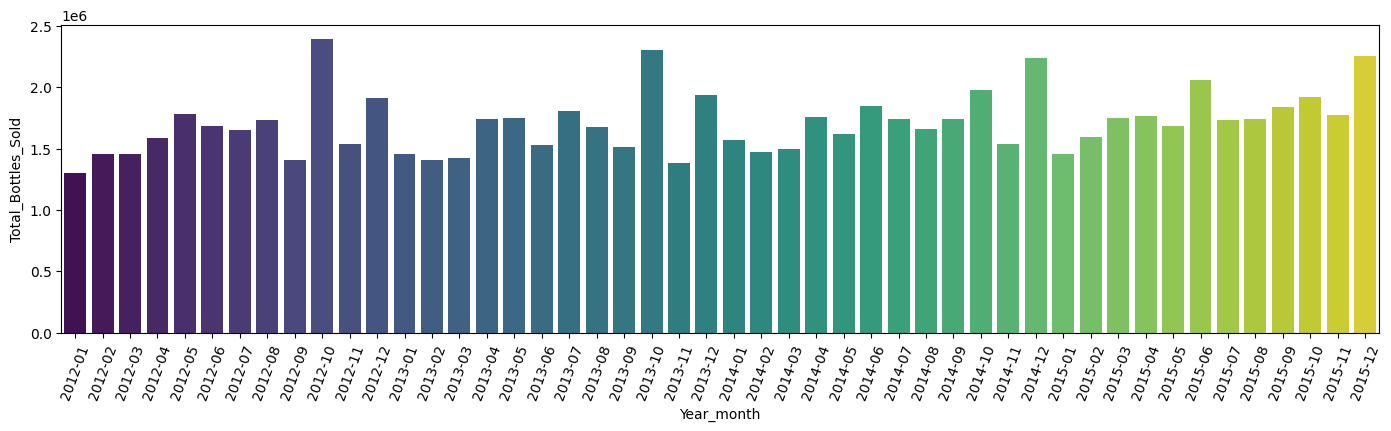

In [16]:
plt.figure(figsize=(17, 4))
sns.barplot(x="Year_m", y="Total_Bottles_Sold",hue = 'Year_m', data=Total_bottles, palette='viridis')
plt.xlabel("Year_month")
plt.ylabel("Total_Bottles_Sold")
plt.xticks(rotation=70)
plt.show()

2. Top 3 sản phẩm bán chạy nhất qua từng năm

In [17]:
df.head(3)

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,County,Category Name,Vendor Name,...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Sales,State Profit Per Bottle,State Profit Total Bottle,Day,Month,Year,Year_m
6,S28865700001,2015-11-09,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,...,104.58,9.0,2.38,104.58,5.81,34.86,9,11,2015,2015-11
8,S29339300091,2015-11-30,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",Muscatine,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,...,117.48,3.0,0.79,117.48,9.79,39.16,30,11,2015,2015-11
13,S28866900001,2015-11-11,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,Ida,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,...,17.43,1.5,0.40,17.43,5.81,5.81,11,11,2015,2015-11


In [18]:
Yearly_Top_3 = df.groupby(['Year', 'Category Name'])['Bottles Sold'].sum()
Top_3_Category = Yearly_Top_3.groupby('Year', group_keys=False).nlargest(3).reset_index(name='Total_Quantity')
print(Top_3_Category)


    Year      Category Name  Total_Quantity
0   2012     VODKA 80 PROOF         3467022
1   2012  CANADIAN WHISKIES         2168256
2   2012         SPICED RUM         1424971
3   2013     VODKA 80 PROOF         3607505
4   2013  CANADIAN WHISKIES         2300254
5   2013         SPICED RUM         1418686
6   2014     VODKA 80 PROOF         3906729
7   2014  CANADIAN WHISKIES         2421768
8   2014         SPICED RUM         1424575
9   2015     VODKA 80 PROOF         4169850
10  2015  CANADIAN WHISKIES         2566595
11  2015         SPICED RUM         1449513


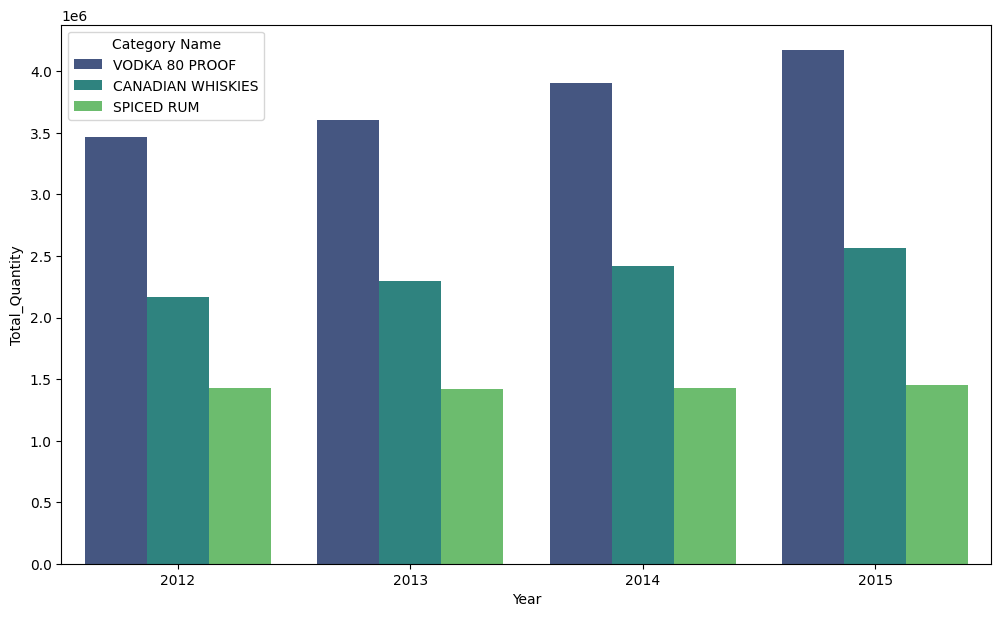

In [19]:
plt.figure(figsize=(12, 7))
sns.barplot(x="Year", y="Total_Quantity",hue = 'Category Name', data=Top_3_Category, palette='viridis')
plt.xlabel("Year")
plt.ylabel("Total_Quantity")
plt.xticks(rotation=0)
plt.show()

3. Lấy ra dữ liệu kinh doanh năm 2015

In [20]:
df_2015 = df[df['Year'] == 2015].reset_index()
df.head(3)

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,County,Category Name,Vendor Name,...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Sales,State Profit Per Bottle,State Profit Total Bottle,Day,Month,Year,Year_m
6,S28865700001,2015-11-09,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,...,104.58,9.0,2.38,104.58,5.81,34.86,9,11,2015,2015-11
8,S29339300091,2015-11-30,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",Muscatine,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,...,117.48,3.0,0.79,117.48,9.79,39.16,30,11,2015,2015-11
13,S28866900001,2015-11-11,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,Ida,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,...,17.43,1.5,0.40,17.43,5.81,5.81,11,11,2015,2015-11


In [21]:
df_2015.to_csv('New_Liquor_Retail.csv')

4. Doanh thu trung bình trên đơn hàng

In [22]:
Revenue_2015= df_2015.groupby(['Year_m'])['Sales'].mean().reset_index(name='Revenue')
print(Revenue_2015)

     Year_m     Revenue
0   2015-01  116.505706
1   2015-02  133.807172
2   2015-03  129.820303
3   2015-04  126.465401
4   2015-05  132.302360
5   2015-06  131.980132
6   2015-07  122.789142
7   2015-08  123.741417
8   2015-09  127.178285
9   2015-10  148.605313
10  2015-11  134.302930
11  2015-12  132.820794


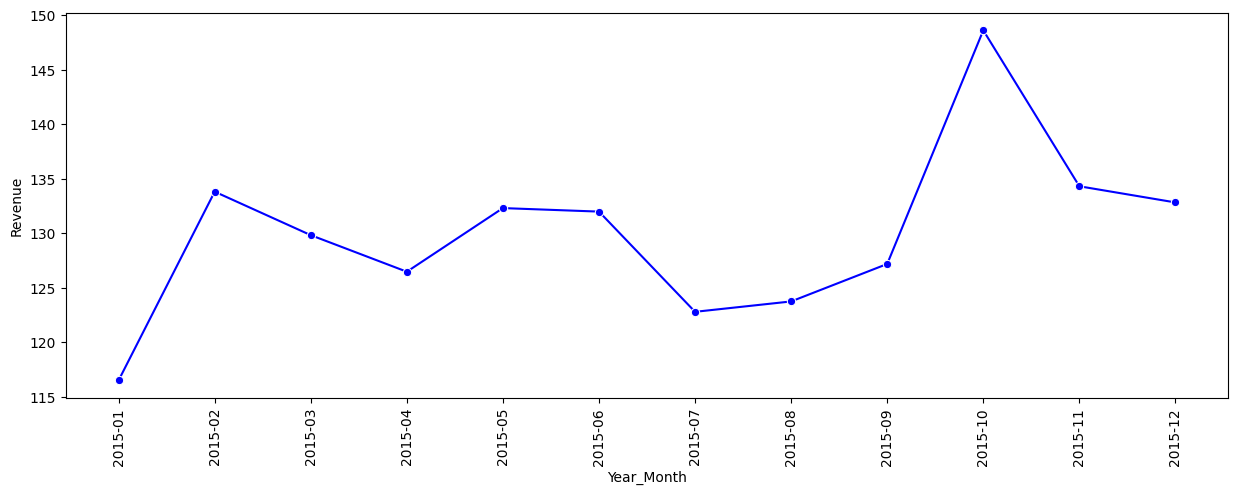

In [23]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="Year_m", y="Revenue", data = Revenue_2015, markers=True, marker='o', color = 'blue' ) #palette='viridis'
plt.xlabel("Year_Month")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

5. Top 10 sản phẩm bán chạy nhất 2015

In [24]:
Top_10_category = df_2015.groupby('Category Name')['Sales'].sum().reset_index()
Top_10_category.head(10)


,Category Name,Sales
0,100 PROOF VODKA,1769950.98
1,AMARETTO - IMPORTED,21388.60
2,AMERICAN ALCOHOL,612331.43
3,AMERICAN AMARETTO,580073.85
4,AMERICAN COCKTAILS,4394948.06
5,AMERICAN DRY GINS,3506854.19
6,AMERICAN GRAPE BRANDIES,3456793.11
7,AMERICAN SLOE GINS,48012.53
8,ANISETTE,9757.93
9,APPLE SCHNAPPS,536394.35


C:\Users\Admin\AppData\Local\Temp\ipykernel_26028\4136456835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Category Name', data=top_10_category, palette='viridis')


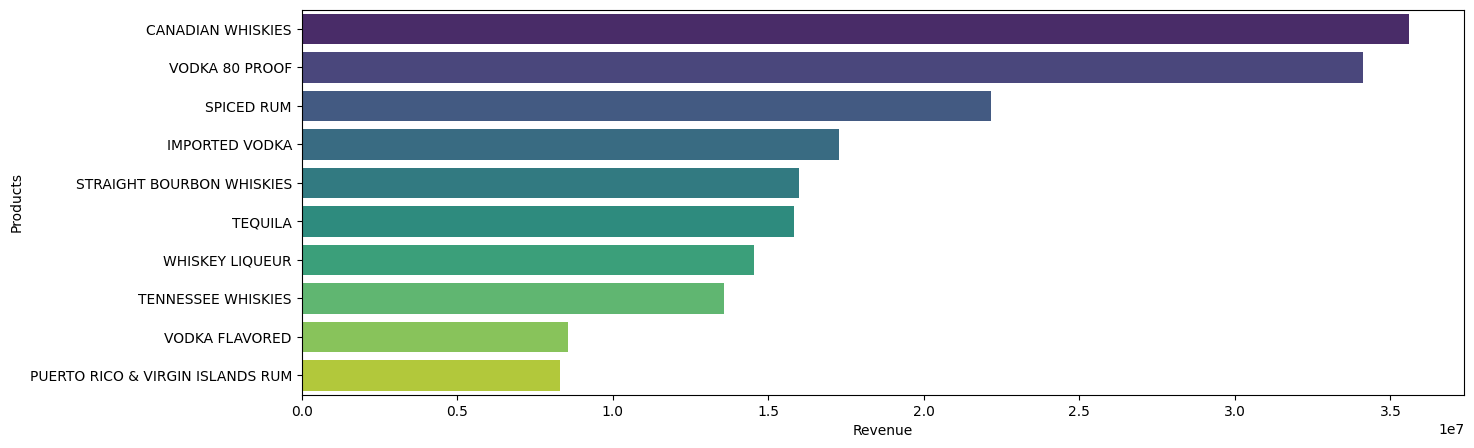

In [25]:
top_10_category = df_2015.groupby('Category Name')['Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x='Sales', y='Category Name', data=top_10_category, palette='viridis')
plt.xlabel("Revenue")
plt.ylabel("Products")
plt.xticks()
plt.show()

6. Tỷ lệ tăng trưởng doanh thu hàng tháng

In [26]:
Revenue_2015['Monthly_Growth'] = Revenue_2015['Revenue'].pct_change()
print(Revenue_2015)

     Year_m     Revenue  Monthly_Growth
0   2015-01  116.505706             NaN
1   2015-02  133.807172        0.148503
2   2015-03  129.820303       -0.029796
3   2015-04  126.465401       -0.025843
4   2015-05  132.302360        0.046155
5   2015-06  131.980132       -0.002436
6   2015-07  122.789142       -0.069639
7   2015-08  123.741417        0.007755
8   2015-09  127.178285        0.027775
9   2015-10  148.605313        0.168480
10  2015-11  134.302930       -0.096244
11  2015-12  132.820794       -0.011036


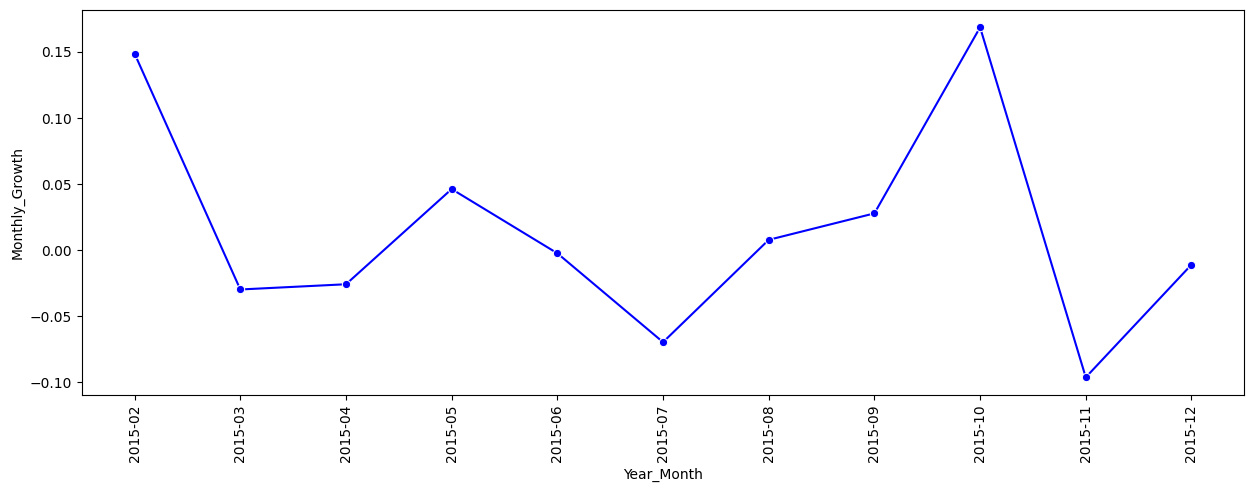

In [27]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="Year_m", y="Monthly_Growth", data = Revenue_2015, markers=True, marker='o', color = 'blue' ) #palette='viridis'
plt.xlabel("Year_Month")
plt.ylabel("Monthly_Growth")
plt.xticks(rotation=90)
plt.show()

7. Doanh thu cửa hàng cũ & mới hàng tháng

In [28]:
# Nhóm dữ liệu theo cột 'store' và xác định ngày đầu tiên mỗi cửa hàng xuất hiện
first_appearance = df_2015.groupby(['Store Name', 'Year_m'])['Date'].min().reset_index()

# Đếm số lượng cửa hàng mới
first_appearance.columns = ['Store Name', 'Min_Year_Month','Min_Date']

print(first_appearance)

                               Store Name Min_Year_Month   Min_Date
0      218 Fuel Express & Chubby's Liquor        2015-01 2015-01-06
1      218 Fuel Express & Chubby's Liquor        2015-02 2015-02-03
2      218 Fuel Express & Chubby's Liquor        2015-03 2015-03-03
3      218 Fuel Express & Chubby's Liquor        2015-04 2015-04-07
4      218 Fuel Express & Chubby's Liquor        2015-05 2015-05-05
...                                   ...            ...        ...
14681                Zapf's Pronto Market        2015-08 2015-08-10
14682                Zapf's Pronto Market        2015-09 2015-09-14
14683                Zapf's Pronto Market        2015-10 2015-10-05
14684                Zapf's Pronto Market        2015-11 2015-11-02
14685                Zapf's Pronto Market        2015-12 2015-12-14

[14686 rows x 3 columns]


In [29]:
df_new = pd.merge(df_2015, first_appearance, on='Store Name')
df_new.head(2)

,index,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,County,Category Name,...,Volume Sold (Gallons),Sales,State Profit Per Bottle,State Profit Total Bottle,Day,Month,Year,Year_m,Min_Year_Month,Min_Date
0,6,S28865700001,2015-11-09,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,...,2.38,104.58,5.81,34.86,9,11,2015,2015-11,2015-01,2015-01-05
1,6,S28865700001,2015-11-09,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,...,2.38,104.58,5.81,34.86,9,11,2015,2015-11,2015-02,2015-02-02


In [30]:
df_new['Store_type'] = 'New'
df_new.loc[df_new['Date'] > df_new['Min_Date'], 'Store_type'] = 'Old'
df_new_store_type = df_new.groupby(['Year_m', 'Store_type'])['Sales'].sum().reset_index()
df_new_store_type

,Year_m,Store_type,Sales
0,2015-01,New,2.029229e+08
1,2015-01,Old,1.289454e+07
2,2015-02,New,2.137719e+08
3,2015-02,Old,3.623041e+07
4,2015-03,New,2.109530e+08
5,2015-03,Old,6.364177e+07
6,2015-04,New,1.861065e+08
7,2015-04,Old,8.428022e+07
8,2015-05,New,1.616187e+08
9,2015-05,Old,1.025362e+08


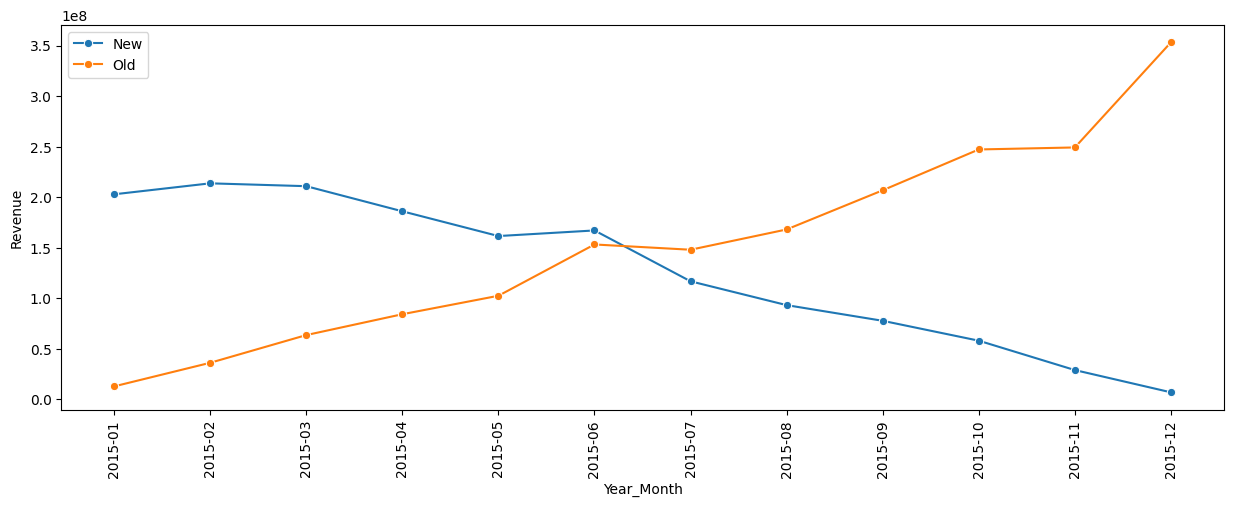

In [31]:

plt.figure(figsize=(15, 5))

# Sử dụng hue='Store_type' để phân biệt màu cho các đường dựa trên giá trị của cột 'Store_type'
sns.lineplot(x="Year_m", y="Sales", hue='Store_type', data= df_new_store_type, markers=True, marker='o')

plt.xlabel("Year_Month")
plt.ylabel("Revenue")

# Hiển thị chú thích
plt.legend()

plt.xticks(rotation=90)
plt.show()


8. Tỷ lệ cửa hàng mới / cũ

In [32]:
Store_new = df_new.query(" Store_type == 'New'")
Store_new_gr = Store_new.groupby(['Year_m'])['Store Name'].nunique()
Store_old = df_new.query(" Store_type == 'Old'")
Store_old_gr = Store_old.groupby(['Year_m'])['Store Name'].nunique()
Store_Ratio = Store_new_gr/Store_old_gr
Store_Ratio = Store_Ratio.reset_index()  
Store_Ratio = Store_Ratio.dropna()
Store_Ratio

,Year_m,Store Name
0,2015-01,1.248175
1,2015-02,1.041451
2,2015-03,1.008306
3,2015-04,1.006612
4,2015-05,1.002488
5,2015-06,1.004055
6,2015-07,1.003279
7,2015-08,1.004906
8,2015-09,1.002453
9,2015-10,1.003271


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2015-01'),
  Text(1, 0, '2015-02'),
  Text(2, 0, '2015-03'),
  Text(3, 0, '2015-04'),
  Text(4, 0, '2015-05'),
  Text(5, 0, '2015-06'),
  Text(6, 0, '2015-07'),
  Text(7, 0, '2015-08'),
  Text(8, 0, '2015-09'),
  Text(9, 0, '2015-10'),
  Text(10, 0, '2015-11'),
  Text(11, 0, '2015-12')])

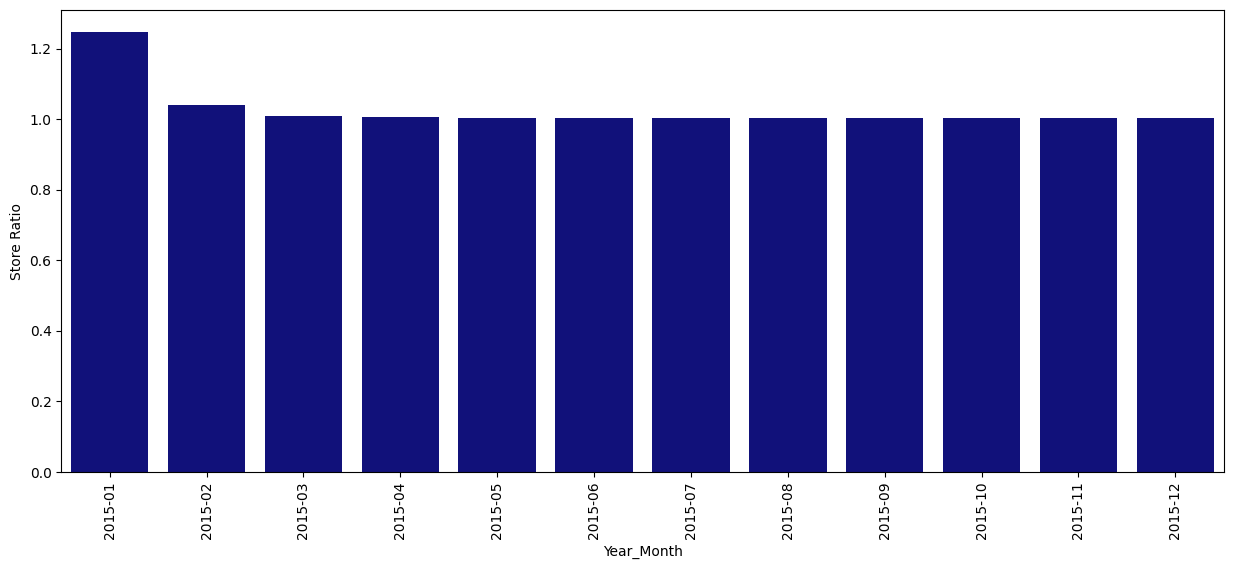

In [33]:

plt.figure(figsize=(15, 6))
sns.barplot(x="Year_m", y="Store Name", data= Store_Ratio, color='darkblue')

plt.xlabel("Year_Month")
plt.ylabel("Store Ratio")
plt.xticks(rotation=90)